In [1]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import shap
import functions as feature
import pandas as pd


In [90]:
#import titanic dataset
data = pd.read_csv('datasets/titanic.csv')
y = data['survived']
X = data.drop(['survived'], axis=1)

In [2]:
#import weather dataset
data = pd.read_csv('datasets/weatherAUS.csv')
data = data.dropna(subset=['RainTomorrow']) #delete rows with NaN values in RainTommorrow

y = data['RainTomorrow']
#convert y from string to binary 
y = pd.to_numeric(y.replace({'No': '0', 'Yes': '1'}))


X = data.drop(['RainTomorrow'], axis=1)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [ ]:
#import heart dataset
data = pd.read_csv('datasets/heart.csv')
y = data['output']
X = data.drop(['output'], axis=1)
data

In [94]:
data = pd.read_csv('datasets/diabetes_sample.csv')
data

,BMI,Age,Fruit_Per_Day,Vegetable_Per_Day,Diabetes,Sex,Smoker,AlcPerWeek,Exercise,General_Health,High_Blood_Pressure,High_Blood_Cholesterol,Weight_Category,Physical_Activity
0,24.0,57,8.00,1.72,No,Male,Never,1167.0,Yes,Good,Yes,No,Normal Weight,Active
1,27.0,78,0.00,0.74,Yes,Female,Some days,0.0,Yes,Fair,Yes,Yes,Overweight,NaN
2,30.0,35,NaN,NaN,No,Female,NaN,NaN,NaN,Good,No,NaN,Overweight,NaN
3,23.0,51,1.29,1.10,No,Female,Never,350.0,Yes,Excellent,No,No,Normal Weight,Highly Active
4,33.0,61,1.28,0.43,No,Female,Never,0.0,No,Good,No,No,Obese,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,68,1.17,1.67,No,Female,Never,0.0,No,Good,Yes,Yes,NaN,Inactive
4996,20.0,27,2.10,3.70,No,Female,NaN,327.0,Yes,Excellent,No,No,Normal Weight,Highly Active
4997,25.0,50,NaN,3.24,No,Male,Every day,47.0,Yes,Good,No,No,Overweight,Highly Active
4998,NaN,55,NaN,NaN,No,Male,NaN,NaN,NaN,Excellent,No,No,NaN,NaN


In [9]:
data = pd.read_csv('datasets/Date_Fruit_Datasets.csv')
y = data['Class']
y = pd.to_numeric(y.replace({'BERHI': '1', 'DEGLET': '2', 'DOKOL': '3', 'IRAQI':'4', 'ROTANA': '5', 'SAFAVI': '6', 'SOGAY': '7'}))
X = data.drop(['Class'], axis=1)
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-2.529642e+10,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-3.160522e+10,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-2.224277e+10,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-2.604860e+10,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [85]:
data = pd.read_csv('datasets/Pumpkin_Seeds_Dataset.csv')
y = data['Class']
X = data.drop(['Class'], axis=1)
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


In [91]:
X = X.select_dtypes(include=[np.number]) #filter X to only include numeric columns
X = X.fillna(X.mean()) #fill NaN values with the mean of the column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_means = X_train.mean().to_frame().T

COLUMNS = X_train.columns

nn = MLPClassifier(solver="adam", alpha=1e-1, hidden_layer_sizes=(10, 10, 10, 10), random_state=0, max_iter=1000)
nn.fit(X_train, y_train)

def print_accuracy(f):
    print(
        "Accuracy = {0}%".format(
            100 *
            np.mean(
                f(X_test) == y_test))
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

print_accuracy(nn.predict)

Accuracy = 48.8%


In [92]:
INDEX = 25
item = X_test.iloc[[INDEX]]
y_test[INDEX]

0

  0%|          | 0/1 [00:00<?, ?it/s]

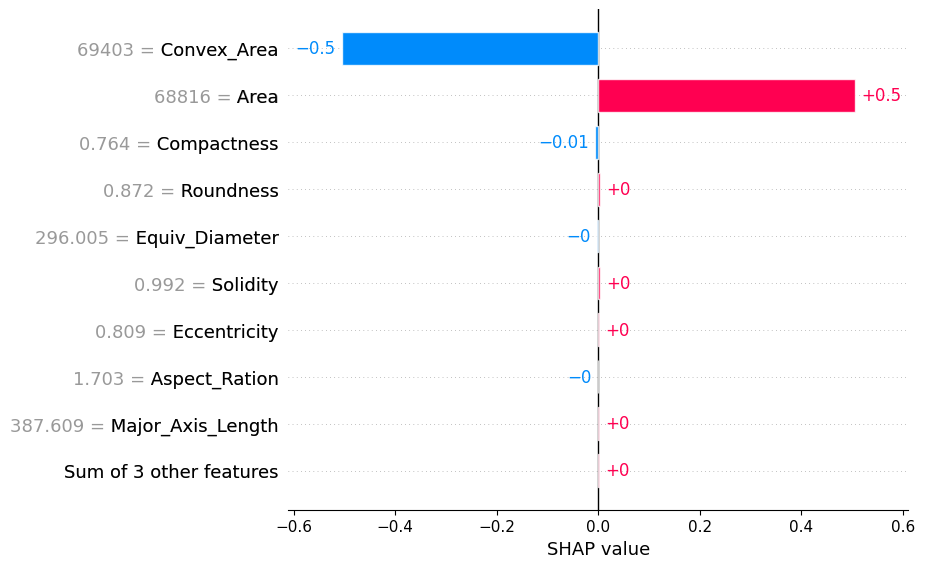

In [93]:
# select only first entry of X_test
shap_values = feature.calc_shap_values(item, X_train_means, nn, COLUMNS)
shap.plots.bar(shap_values[0])

  0%|          | 0/1 [00:00<?, ?it/s]

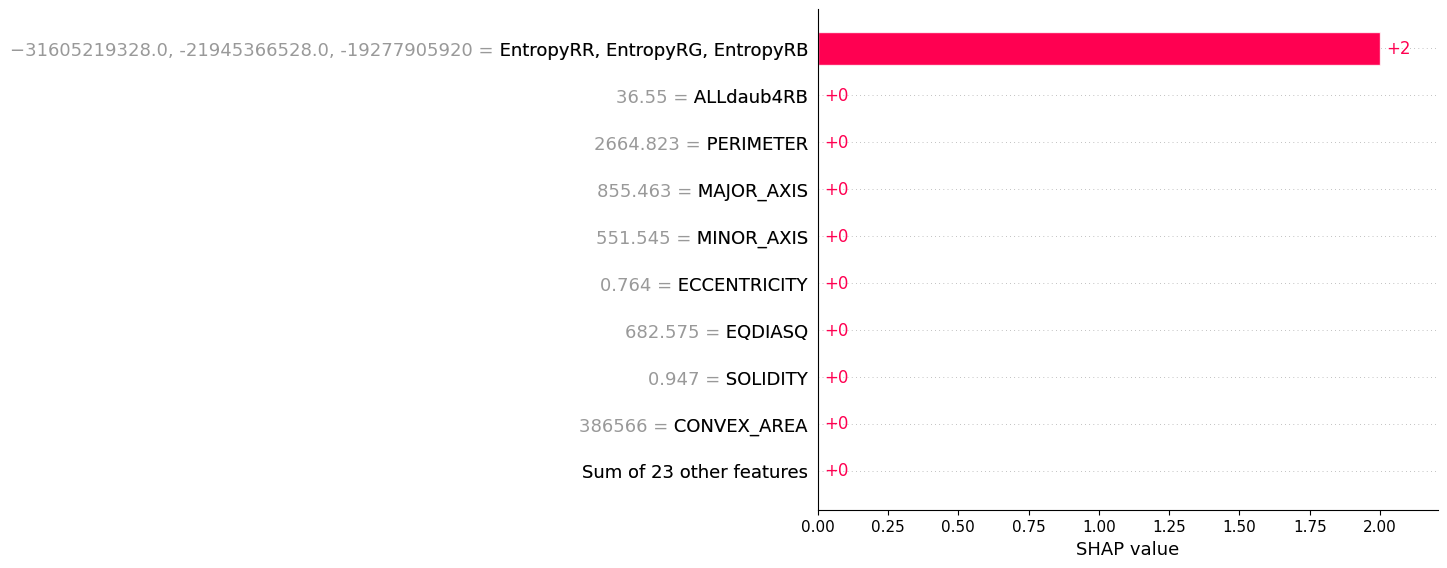

In [68]:
#entangle the named columns
COL_LIST = [['EntropyRR', 'EntropyRG', 'EntropyRB']]
shap_values = feature.calc_shap_values(item, X_train_means, nn, COLUMNS, COL_LIST)
shap.plots.bar(shap_values[0])

In [24]:
COLUMNS

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB'],
      dtype='object')